In [138]:
import torch
import torch.nn as nn

import pandas as pd
import matplotlib.pyplot as plt

In [145]:
class MLP(nn.Module):
  def __init__(self, layers):
    super().__init__()
    
    linear_modules = [nn.Linear(x,y) for x,y in zip(layers[:-1], layers[1:])]
    self.layers = nn.ModuleList(linear_modules)
  
  def forward(self, x):
    activation = nn.LeakyReLU()
    for layer in self.layers:
      x = activation(layer(x))
    
    return x

In [146]:
def train(model, dataX, dataY, max_epochs, learning_rate, verbose=True):
  criterion = nn.MSELoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  mse = float('inf')
  epoch = 0
  while mse > 0.01 and epoch < max_epochs:
    outputs = model.forward(dataX)
    optimizer.zero_grad()
    loss = criterion(outputs, dataY)
    loss.backward()
    optimizer.step()
    
    if verbose:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))
    
    epoch += 1
    mse = loss.item()
  
  return epoch, mse

def test(model, dataX, dataY):
  model.eval()
  predictions = model(dataX)

  dataY = dataY.numpy().astype(int)
  predictions = (predictions.detach().numpy()+0.5).astype(int)
  
  acc = 0
  for x,y in zip(predictions, dataY):
    acc += all(x == y)
  acc /= len(dataX)

  return acc

In [147]:
def run(N, dir):
  df = pd.read_csv(f"data/{dir}/perm{N}.csv")
  dataX = torch.Tensor(df.iloc[:,:N].values)
  dataY = torch.Tensor(df.iloc[:,N:].values)

  model = MLP([N,100,100,100,N])
  epoch, train_mse = train(model, dataX, dataY, 10000, 0.01, True)
  acc = test(model, dataX, dataY)

  return epoch, train_mse, acc

In [148]:
two_swap_results = []
for n in range(4,9):
  epoch, train_mse, acc = run(n, "2swap")
  two_swap_results.append((epoch, train_mse, acc))
  print(n, epoch, train_mse, acc)

Epoch: 0, loss: 7.37792
Epoch: 1, loss: 4.27785
Epoch: 2, loss: 1.69722
Epoch: 3, loss: 3.33881
Epoch: 4, loss: 1.22831
Epoch: 5, loss: 1.48448
Epoch: 6, loss: 1.93914
Epoch: 7, loss: 1.91259
Epoch: 8, loss: 1.56274
Epoch: 9, loss: 1.20790
Epoch: 10, loss: 1.17893
Epoch: 11, loss: 1.34822
Epoch: 12, loss: 1.25920
Epoch: 13, loss: 1.02026
Epoch: 14, loss: 0.94693
Epoch: 15, loss: 1.03179
Epoch: 16, loss: 1.10427
Epoch: 17, loss: 1.05906
Epoch: 18, loss: 0.91867
Epoch: 19, loss: 0.77507
Epoch: 20, loss: 0.71987
Epoch: 21, loss: 0.74192
Epoch: 22, loss: 0.74094
Epoch: 23, loss: 0.67539
Epoch: 24, loss: 0.62613
Epoch: 25, loss: 0.62104
Epoch: 26, loss: 0.60987
Epoch: 27, loss: 0.56965
Epoch: 28, loss: 0.51526
Epoch: 29, loss: 0.48344
Epoch: 30, loss: 0.47647
Epoch: 31, loss: 0.47027
Epoch: 32, loss: 0.44878
Epoch: 33, loss: 0.42346
Epoch: 34, loss: 0.41083
Epoch: 35, loss: 0.40580
Epoch: 36, loss: 0.39291
Epoch: 37, loss: 0.37154
Epoch: 38, loss: 0.35859
Epoch: 39, loss: 0.35702
Epoch: 40,

In [149]:
n_swap_results = []
for n in range(4,9):
  epoch, train_mse, acc = run(n, "nswap")
  n_swap_results.append((epoch, train_mse, acc))
  print(n, epoch, train_mse, acc)

Epoch: 0, loss: 7.25487
Epoch: 1, loss: 5.46167
Epoch: 2, loss: 3.45182
Epoch: 3, loss: 2.13337
Epoch: 4, loss: 0.91937
Epoch: 5, loss: 0.63505
Epoch: 6, loss: 0.87208
Epoch: 7, loss: 1.00091
Epoch: 8, loss: 0.92709
Epoch: 9, loss: 0.75968
Epoch: 10, loss: 0.59494
Epoch: 11, loss: 0.49831
Epoch: 12, loss: 0.47250
Epoch: 13, loss: 0.49139
Epoch: 14, loss: 0.51978
Epoch: 15, loss: 0.53425
Epoch: 16, loss: 0.52902
Epoch: 17, loss: 0.50693
Epoch: 18, loss: 0.47814
Epoch: 19, loss: 0.45120
Epoch: 20, loss: 0.43238
Epoch: 21, loss: 0.42343
Epoch: 22, loss: 0.42172
Epoch: 23, loss: 0.42129
Epoch: 24, loss: 0.41726
Epoch: 25, loss: 0.40781
Epoch: 26, loss: 0.39569
Epoch: 27, loss: 0.38327
Epoch: 28, loss: 0.37284
Epoch: 29, loss: 0.36560
Epoch: 30, loss: 0.35930
Epoch: 31, loss: 0.35326
Epoch: 32, loss: 0.34652
Epoch: 33, loss: 0.33749
Epoch: 34, loss: 0.32484
Epoch: 35, loss: 0.31315
Epoch: 36, loss: 0.30199
Epoch: 37, loss: 0.29142
Epoch: 38, loss: 0.28278
Epoch: 39, loss: 0.27376
Epoch: 40,

In [150]:
three_swap_results = []
for n in range(4,9):
  epoch, train_mse, acc = run(n, "3swap")
  three_swap_results.append((epoch, train_mse, acc))
  print(n, epoch, train_mse, acc)

Epoch: 0, loss: 7.15817
Epoch: 1, loss: 4.95153
Epoch: 2, loss: 3.48351
Epoch: 3, loss: 2.09194
Epoch: 4, loss: 1.03399
Epoch: 5, loss: 0.96163
Epoch: 6, loss: 1.19027
Epoch: 7, loss: 1.32403
Epoch: 8, loss: 1.23454
Epoch: 9, loss: 1.09866
Epoch: 10, loss: 0.96708
Epoch: 11, loss: 0.87890
Epoch: 12, loss: 0.83321
Epoch: 13, loss: 0.79356
Epoch: 14, loss: 0.79326
Epoch: 15, loss: 0.78474
Epoch: 16, loss: 0.78874
Epoch: 17, loss: 0.76262
Epoch: 18, loss: 0.73144
Epoch: 19, loss: 0.67587
Epoch: 20, loss: 0.63498
Epoch: 21, loss: 0.58775


Epoch: 22, loss: 0.55561
Epoch: 23, loss: 0.52090
Epoch: 24, loss: 0.48666
Epoch: 25, loss: 0.46945
Epoch: 26, loss: 0.44826
Epoch: 27, loss: 0.41784
Epoch: 28, loss: 0.39519
Epoch: 29, loss: 0.37118
Epoch: 30, loss: 0.34714
Epoch: 31, loss: 0.33552
Epoch: 32, loss: 0.32045
Epoch: 33, loss: 0.31038
Epoch: 34, loss: 0.29400
Epoch: 35, loss: 0.27896
Epoch: 36, loss: 0.26558
Epoch: 37, loss: 0.25114
Epoch: 38, loss: 0.23965
Epoch: 39, loss: 0.22913
Epoch: 40, loss: 0.21766
Epoch: 41, loss: 0.20863
Epoch: 42, loss: 0.19759
Epoch: 43, loss: 0.18818
Epoch: 44, loss: 0.17944
Epoch: 45, loss: 0.17324
Epoch: 46, loss: 0.16960
Epoch: 47, loss: 0.16180
Epoch: 48, loss: 0.15373
Epoch: 49, loss: 0.14702
Epoch: 50, loss: 0.14166
Epoch: 51, loss: 0.13932
Epoch: 52, loss: 0.13674
Epoch: 53, loss: 0.12998
Epoch: 54, loss: 0.12490
Epoch: 55, loss: 0.12198
Epoch: 56, loss: 0.11797
Epoch: 57, loss: 0.11263
Epoch: 58, loss: 0.10900
Epoch: 59, loss: 0.10590
Epoch: 60, loss: 0.10099
Epoch: 61, loss: 0.09553


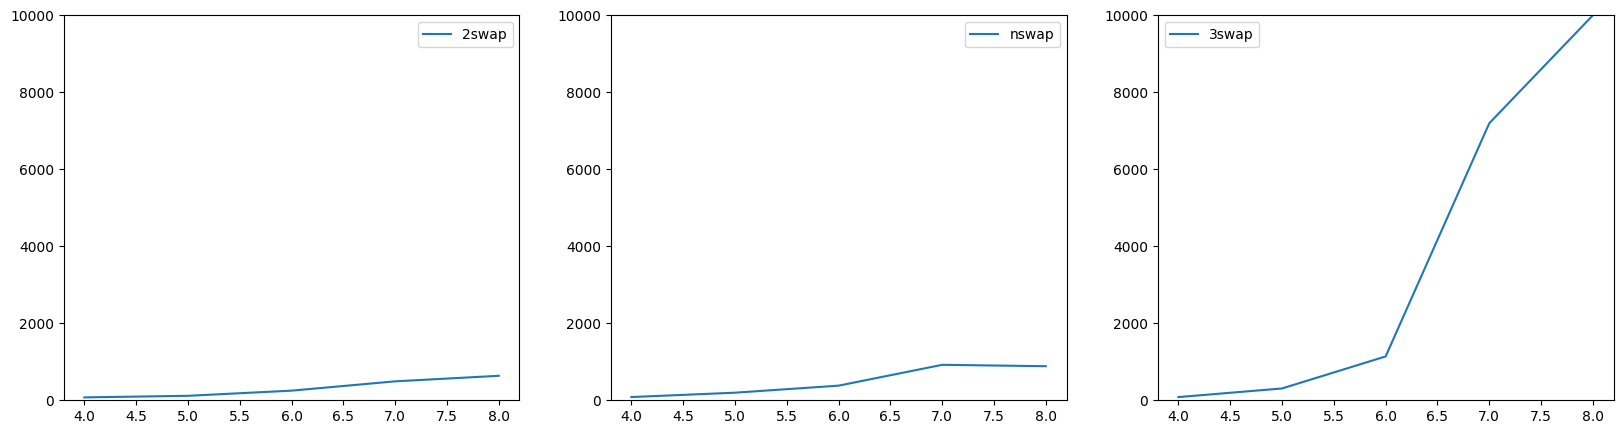

In [156]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
ax1, ax2, ax3 = axes.flatten()
ax1.plot(range(4,9), [x[0] for x in two_swap_results], label="2swap")
ax2.plot(range(4,9), [x[0] for x in n_swap_results], label="nswap")
ax3.plot(range(4,9), [x[0] for x in three_swap_results], label="3swap")
for ax in axes:
  ax.legend()
  ax.set_ylim((0,10000))

In [157]:
two_swap_results

[(75, 0.008962539955973625, 1.0),
 (116, 0.00987878255546093, 0.9915966386554622),
 (250, 0.009098641574382782, 0.9958275382475661),
 (492, 0.009962649084627628, 0.9974201230402858),
 (636, 0.009654284454882145, 0.9909968005158858)]

In [158]:
n_swap_results

[(84, 0.008191718719899654, 1.0),
 (197, 0.009877409785985947, 0.9915966386554622),
 (380, 0.009606105275452137, 0.9874826147426982),
 (921, 0.009938262403011322, 0.982734669577297),
 (885, 0.009987114928662777, 0.9850442719313475)]

In [159]:
three_swap_results

[(83, 0.008603434078395367, 1.0),
 (307, 0.009627454914152622, 0.9915966386554622),
 (1139, 0.009632691740989685, 0.9916550764951322),
 (7195, 0.009953885339200497, 0.9892835880134947),
 (10000, 0.1832769215106964, 0.6532652099506436)]